In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
print(len(var_categorical), len(var_numerical))

10 10


In [5]:
df.replace('unknown', np.NaN, inplace=True)
df.isnull().sum()/len(df)*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [6]:
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Age: 78
1. Job: 11
2. Marital: 3
3. Education: 7
4. Default: 2
5. Housing: 2
6. Loan: 2
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1544
11. Campaign: 42
12. Pdays: 27
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 316
19. Nr.Employed: 11
20. Y: 2


In [7]:
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

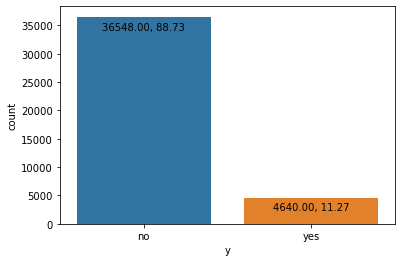

In [8]:
ax = sns.countplot(x = df["y"])  #Imbalanced dataset
label_values(ax, spacing=-15)
plt.show()

Job


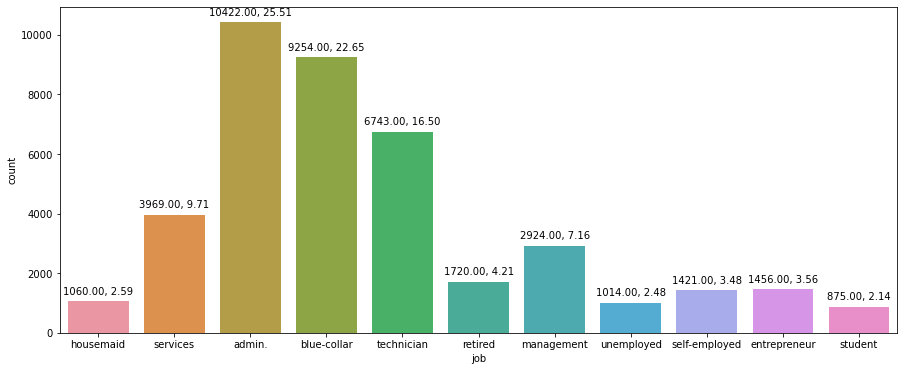

Marital


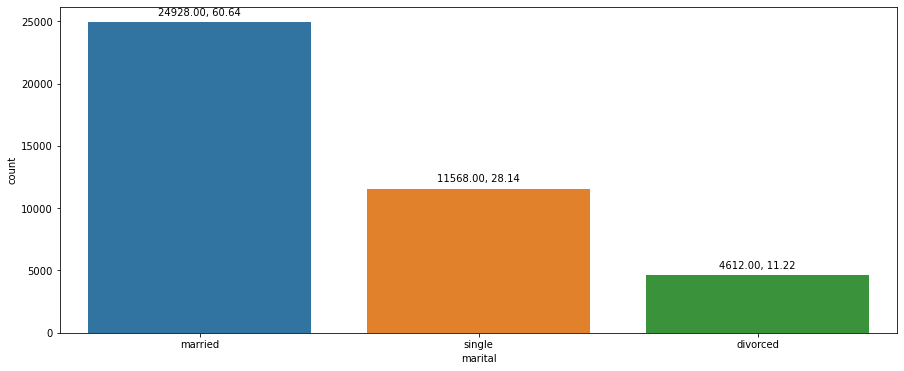

Education


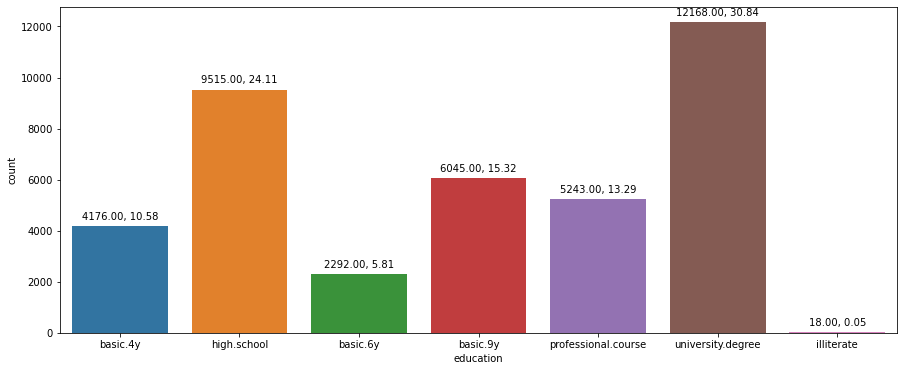

Default


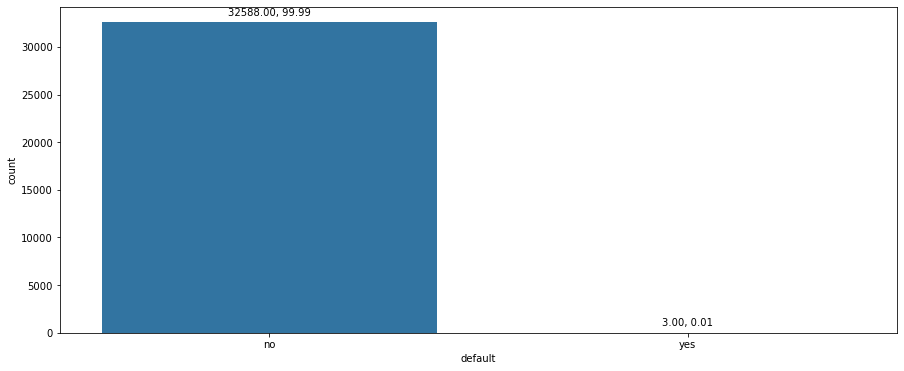

Housing


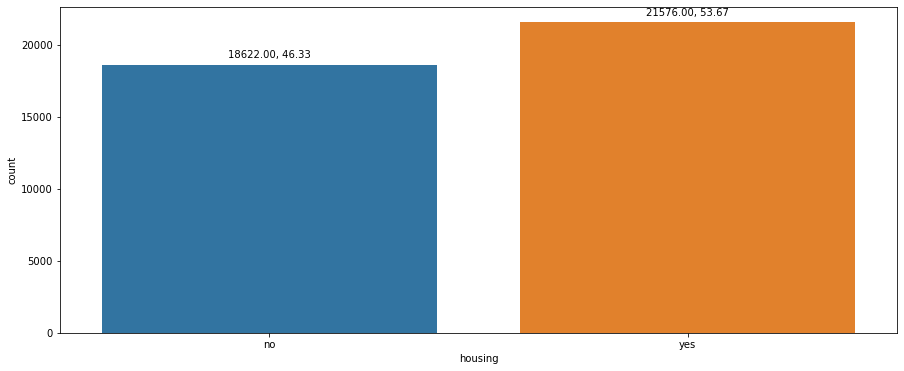

Loan


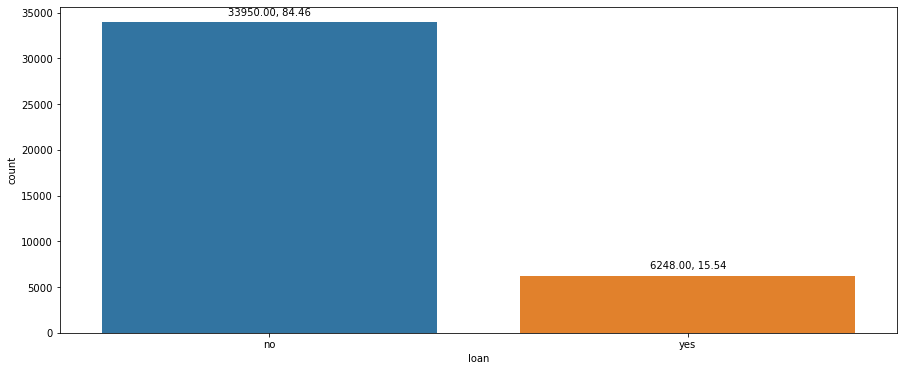

Contact


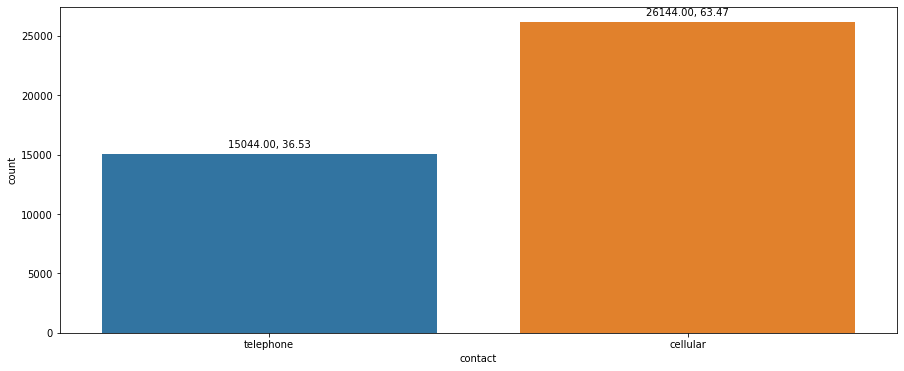

Month


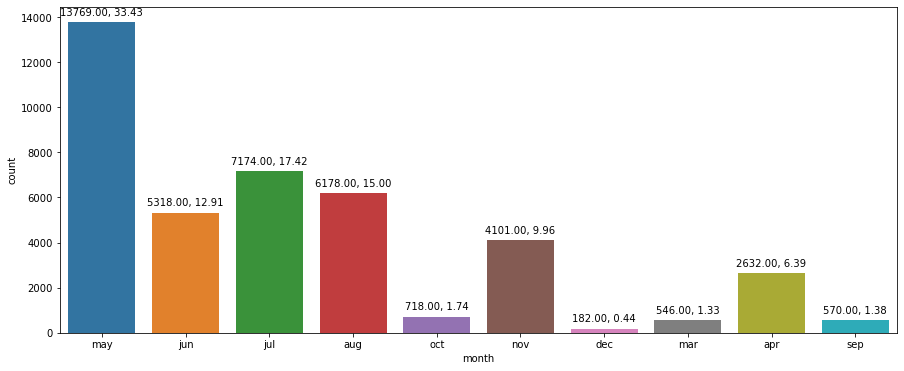

Day_Of_Week


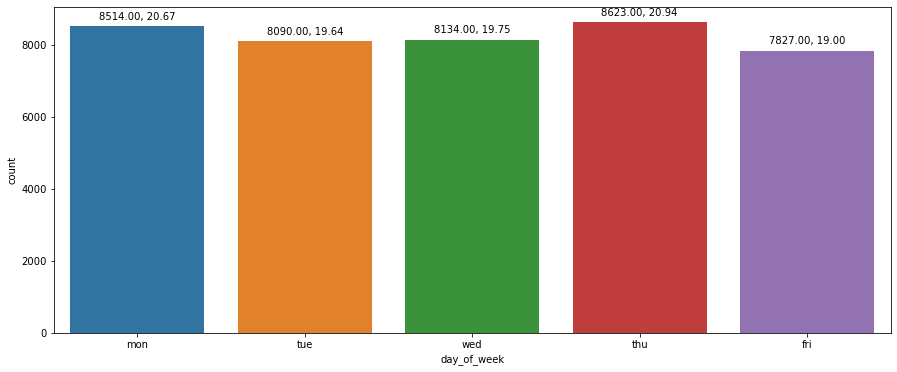

Poutcome


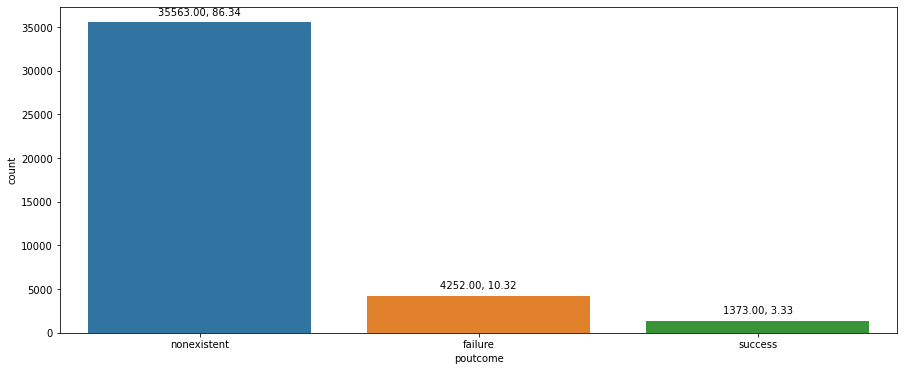

In [9]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column])
    label_values(ax)
    plt.show()

Job


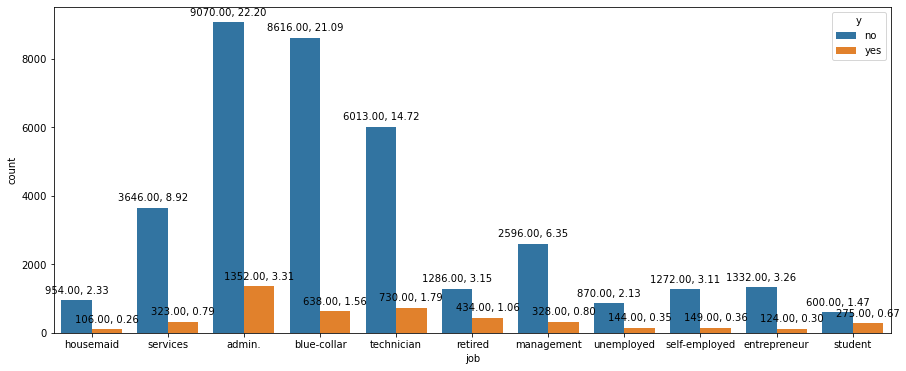

Marital


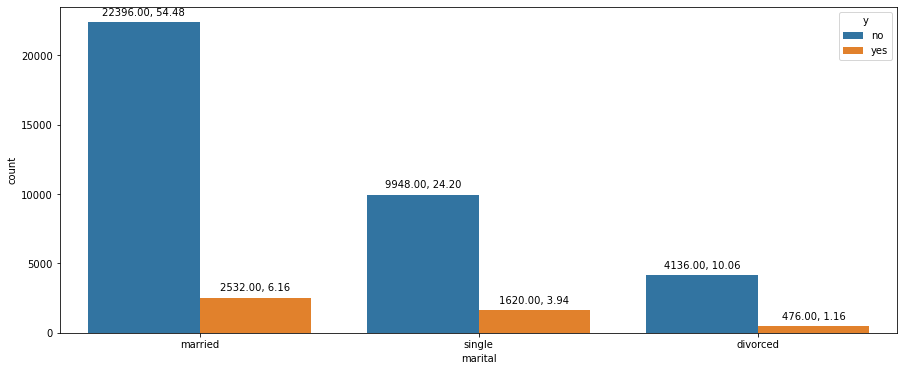

Education


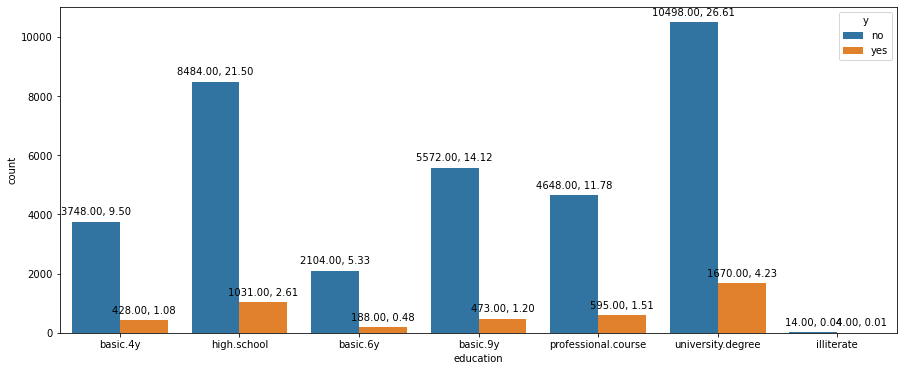

Default


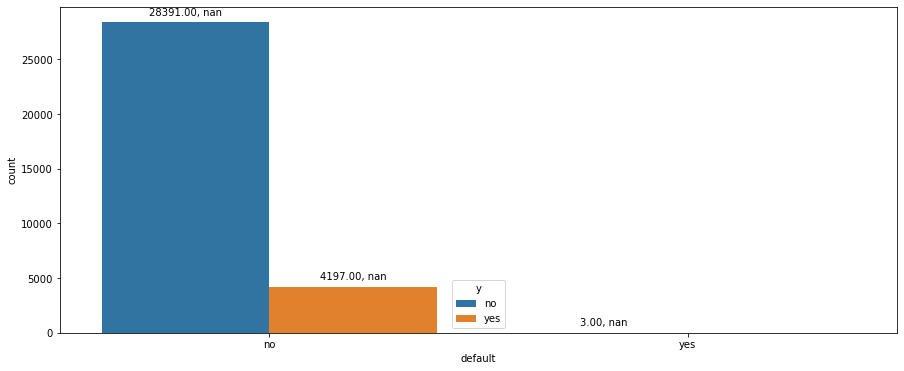

Housing


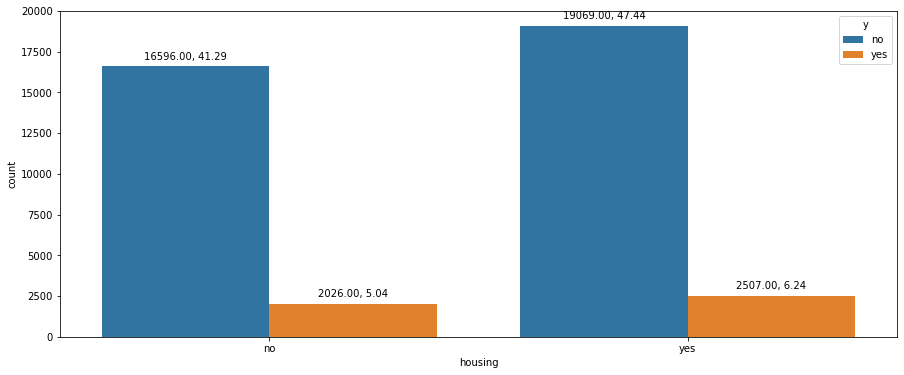

Loan


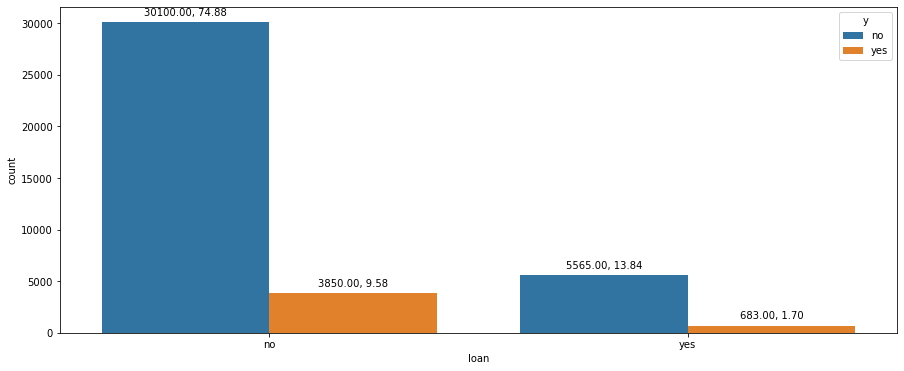

Contact


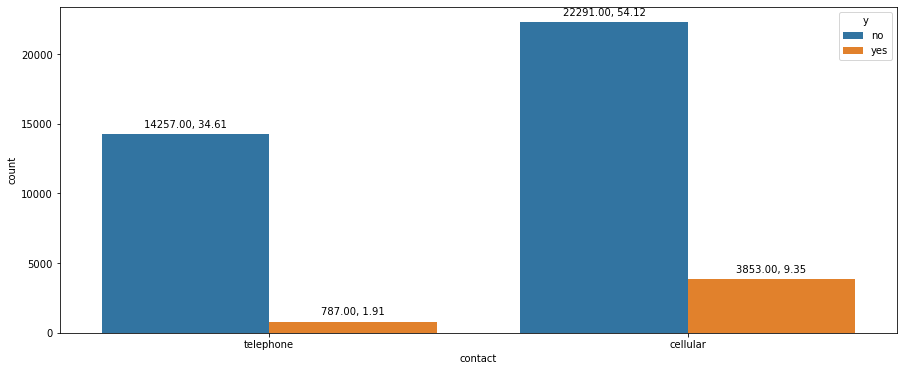

Month


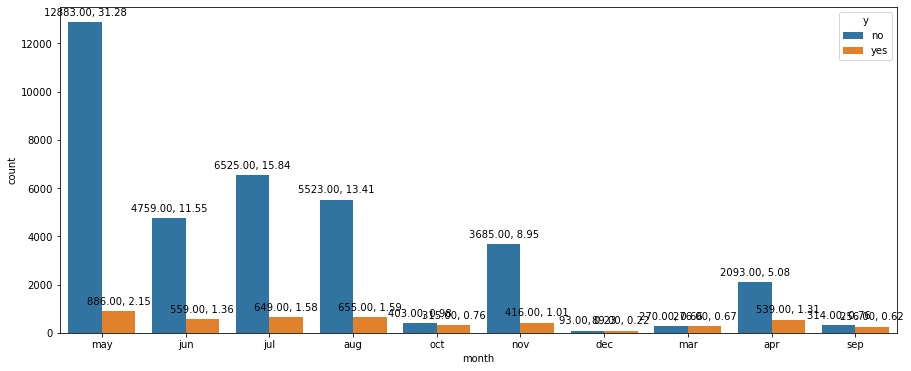

Day_Of_Week


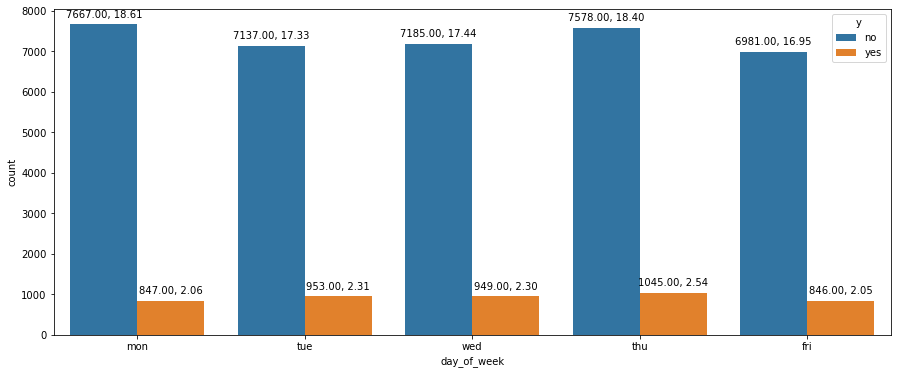

Poutcome


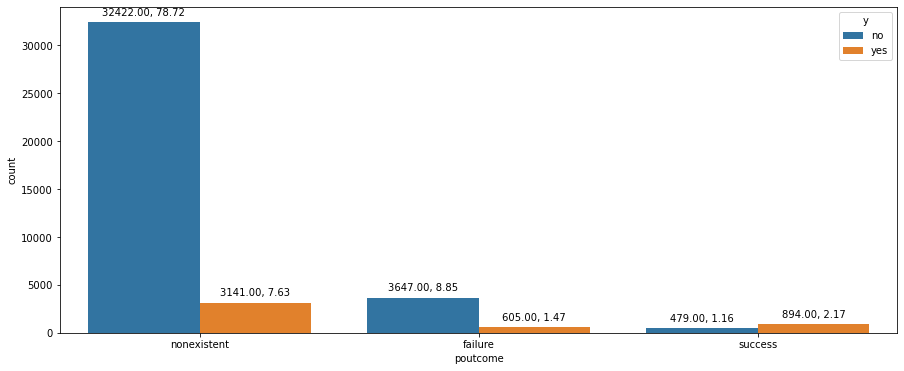

In [10]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column], hue=df["y"])
    label_values(ax)
    plt.show()

In [11]:
df.drop(["default"], axis = 1, inplace=True)
var_categorical = list(set(var_categorical) - set(['default']))
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   duration        38245 non-null  int64  
 10  campaign        38245 non-null  int64  
 11  pdays           38245 non-null  int64  
 12  previous        38245 non-null  int64  
 13  poutcome        38245 non-null  object 
 14  emp.var.rate    38245 non-null  float64
 15  cons.price.idx  38245 non-null  float64
 16  cons.conf.idx   38245 non-null  float64
 17  euribor3m       38245 non-null 

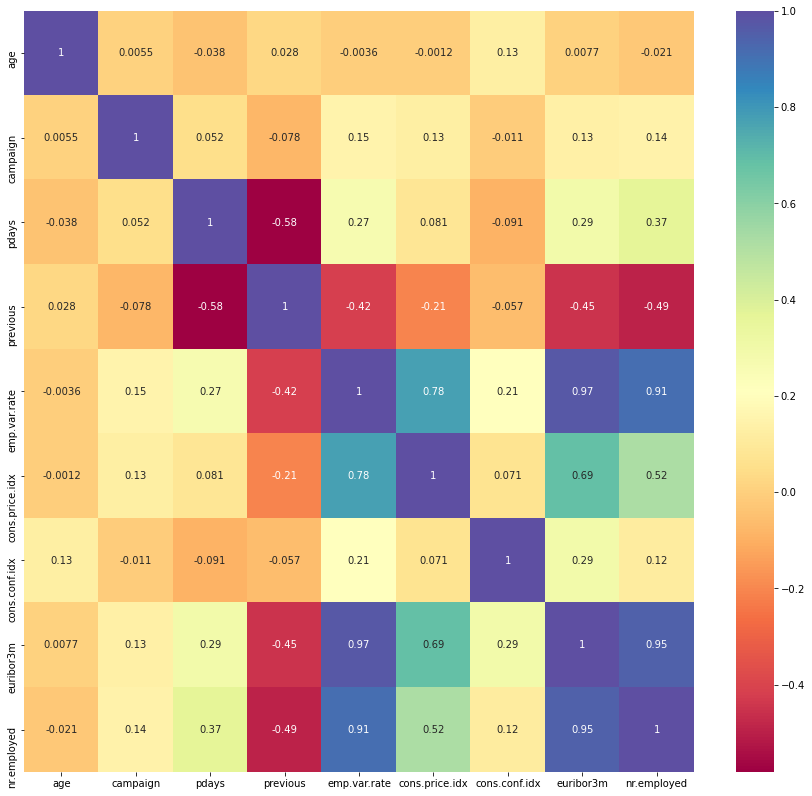

In [12]:
duration = df["duration"]
df.drop(["duration"], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['duration']))
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

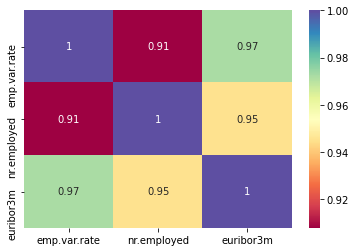

In [13]:
sns.heatmap(df[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Spectral')
plt.show()

Pdays


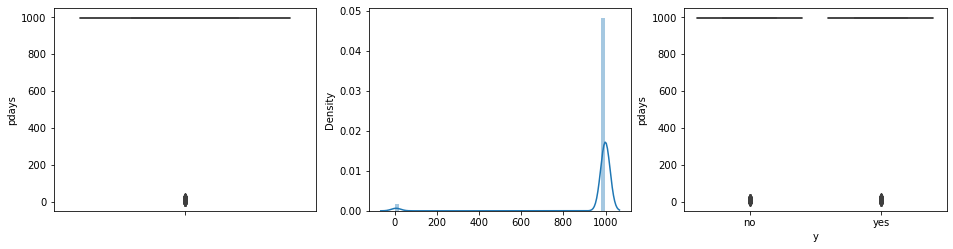

Previous


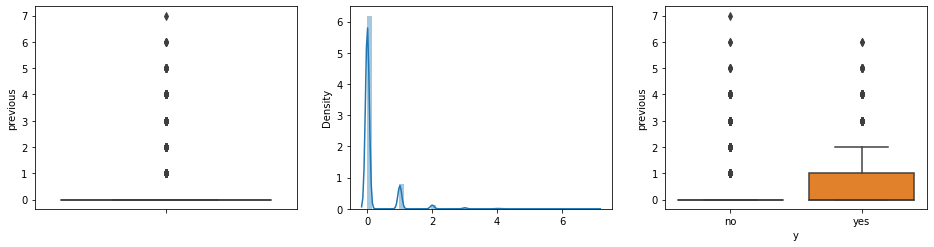

Cons.Conf.Idx


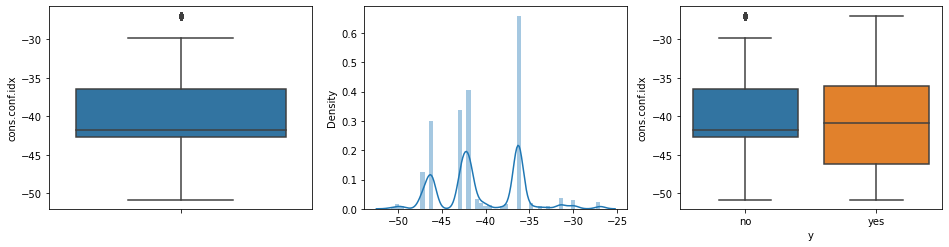

Age


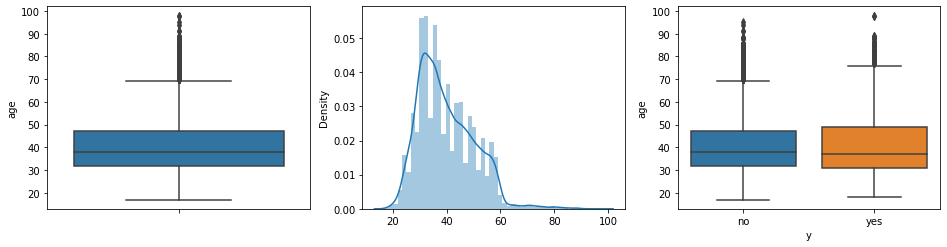

Cons.Price.Idx


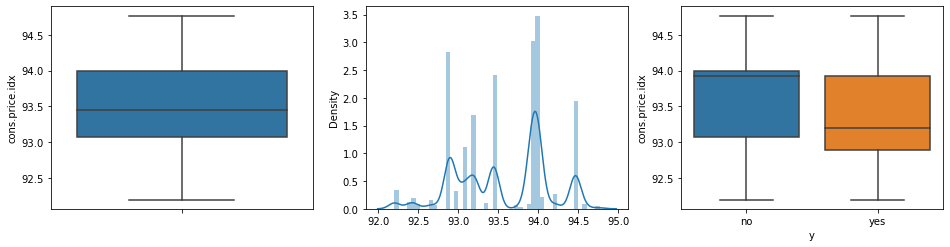

Euribor3M


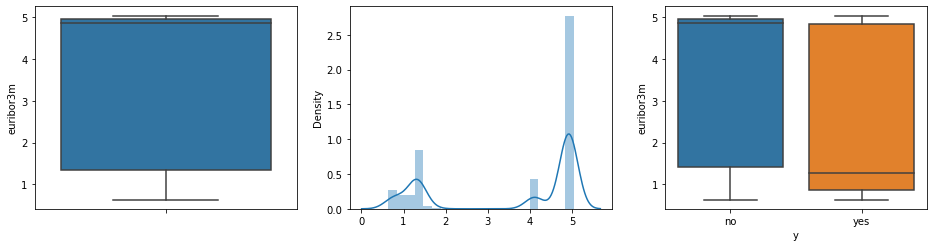

Campaign


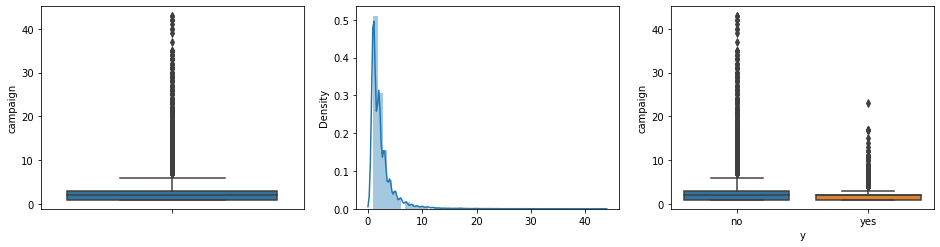

In [14]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(y = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.distplot(x = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(x = df["y"], y = df[column])
    i += 1
    plt.show()

In [15]:
df[var_numerical].describe()

,pdays,previous,cons.conf.idx,age,cons.price.idx,euribor3m,campaign
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,963.531651,0.170009,-40.541164,39.860871,93.570313,3.623298,2.566662
std,184.295254,0.487169,4.623200,10.289488,0.576367,1.730226,2.767473
min,0.000000,0.000000,-50.800000,17.000000,92.201000,0.634000,1.000000
25%,999.000000,0.000000,-42.700000,32.000000,93.075000,1.344000,1.000000
50%,999.000000,0.000000,-41.800000,38.000000,93.444000,4.857000,2.000000
75%,999.000000,0.000000,-36.400000,47.000000,93.994000,4.961000,3.000000
max,999.000000,7.000000,-26.900000,98.000000,94.767000,5.045000,43.000000


In [16]:
print(df["campaign"].quantile(0.05), len(df[df["campaign"]<df["campaign"].quantile(0.05)] ))
print(df["campaign"].quantile(0.95), len(df[df["campaign"]>df["campaign"].quantile(0.95)] ))

1.0 0
7.0 1636


In [17]:
df1 = df[(df["campaign"] > 23) & (df["y"] == 'yes')]
len(df1[['campaign', 'y']])

0

In [18]:
df1 = df[(df["campaign"] > 8) & (df["y"] == 'yes')]
print(len(df1[['campaign', 'y']]), len(df[df["campaign"]>8]))

49 1264


In [19]:
df["campaign"] = df["campaign"].apply(lambda x: 8 if x > 8 else x)
print(df["age"].quantile(0.05), len(df[df["age"]<df["age"].quantile(0.05)] ))
print(df["age"].quantile(0.95), len(df[df["age"]>df["age"].quantile(0.95)] ))

26.0 1484
58.0 1435


In [20]:
print(df["previous"].quantile(0.05), len(df[df["previous"]<df["previous"].quantile(0.05)] ))
print(df["previous"].quantile(0.95), len(df[df["previous"]>2] ))

0.0 0
1.0 273


In [21]:
for i in range(1, max(df["previous"])+1):
    print(i, end = " ")
    df1 = df[(df["previous"] >= i) & (df["y"] == 'yes')]
    print(len(df1[['previous', 'y']]), len(df[df["previous"]>= i]))

1 1336 5179
2 466 945
3 160 273
4 43 78
5 13 21
6 2 5
7 0 1


In [22]:
df["previous"] = df["previous"].apply(lambda x: 2 if x >= 2 else x)
print(df["pdays"].quantile(0.05), len(df[df["pdays"]<df["pdays"].quantile(0.05)] ))
print(df["pdays"].quantile(0.95), len(df[df["pdays"]>df["pdays"].quantile(0.95)] ))

999.0 1366
999.0 0


In [23]:
df1 = df[(df["pdays"] >= 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]>=999]))
df1 = df[(df["pdays"] < 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<999]))
df1 = df[(df["pdays"] < 28) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<28]))
df1 = df[(df["pdays"] < 20) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<20]))
df1 = df[(df["pdays"] < 10) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<10]))

3393 36879
865 1366
865 1366
858 1358
734 1140


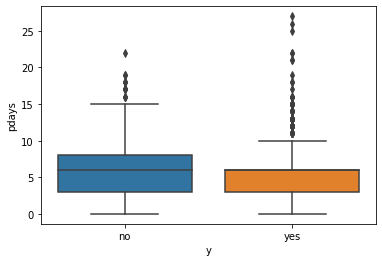

In [24]:
df1 = df[~(df["pdays"] >= 999)]
sns.boxplot(x = df1["y"], y = df1['pdays'])
plt.show()

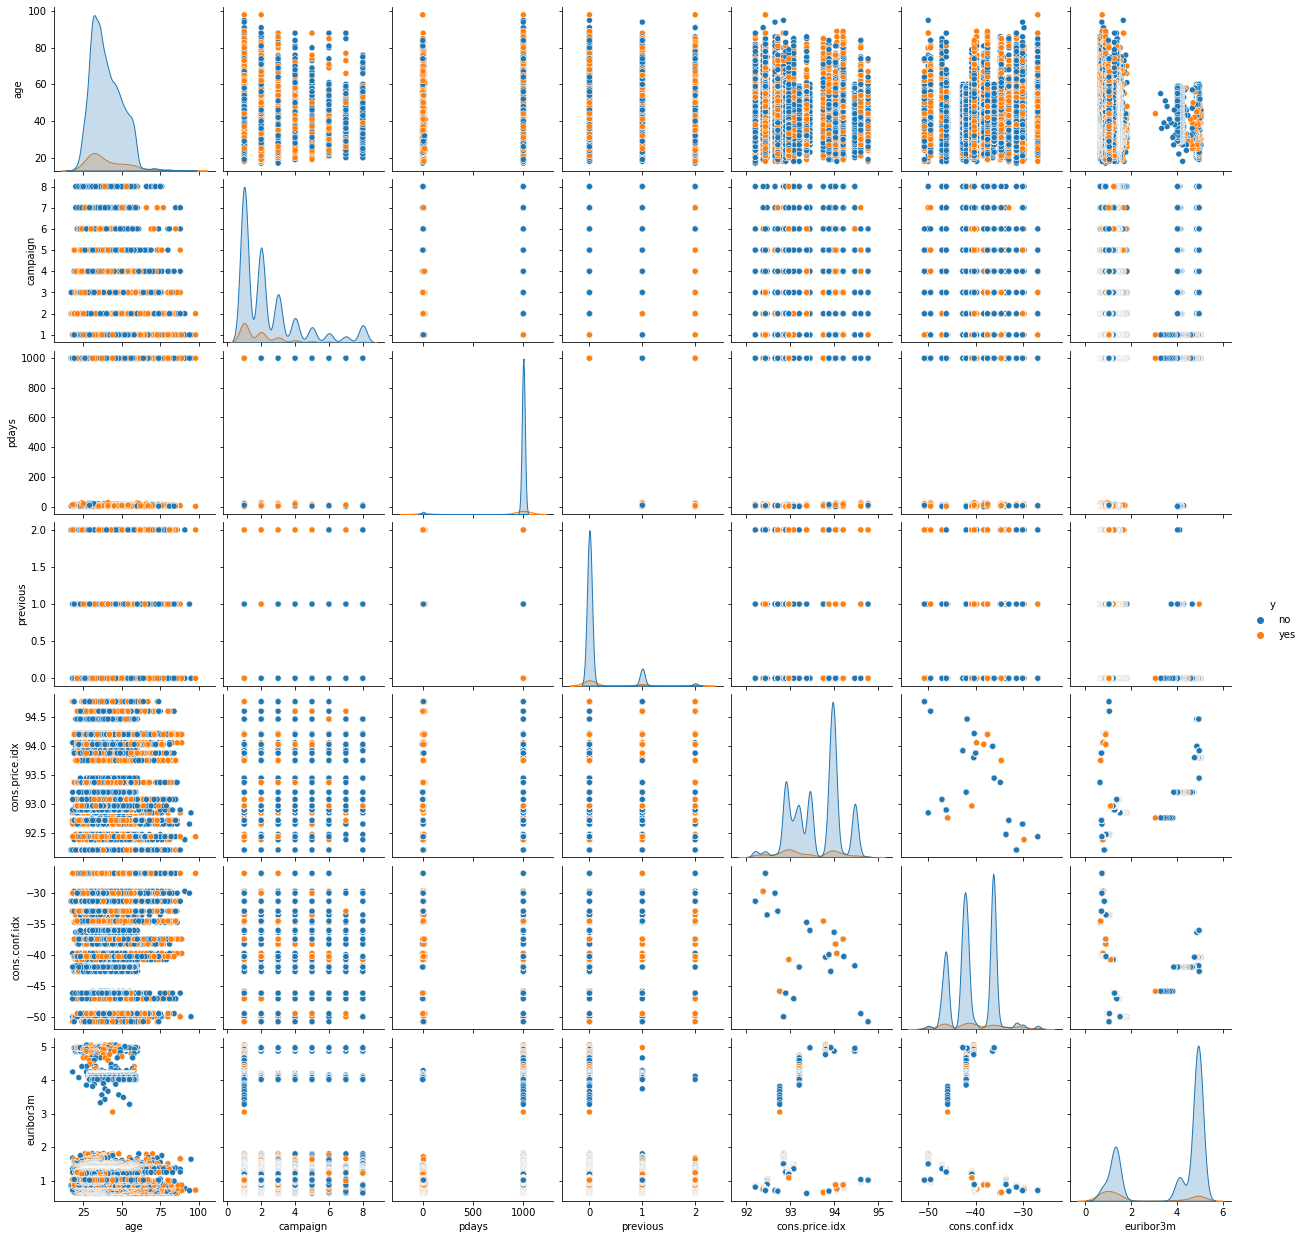

In [25]:
sns.pairplot(hue='y', data = df)
plt.show()

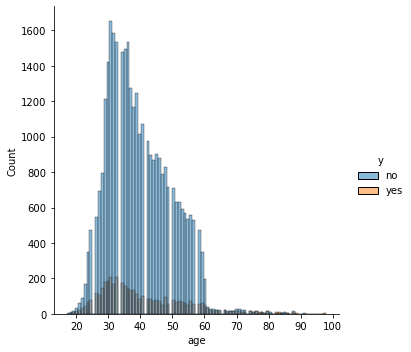

In [26]:
sns.displot(x = 'age', hue='y', data=df)
plt.show()

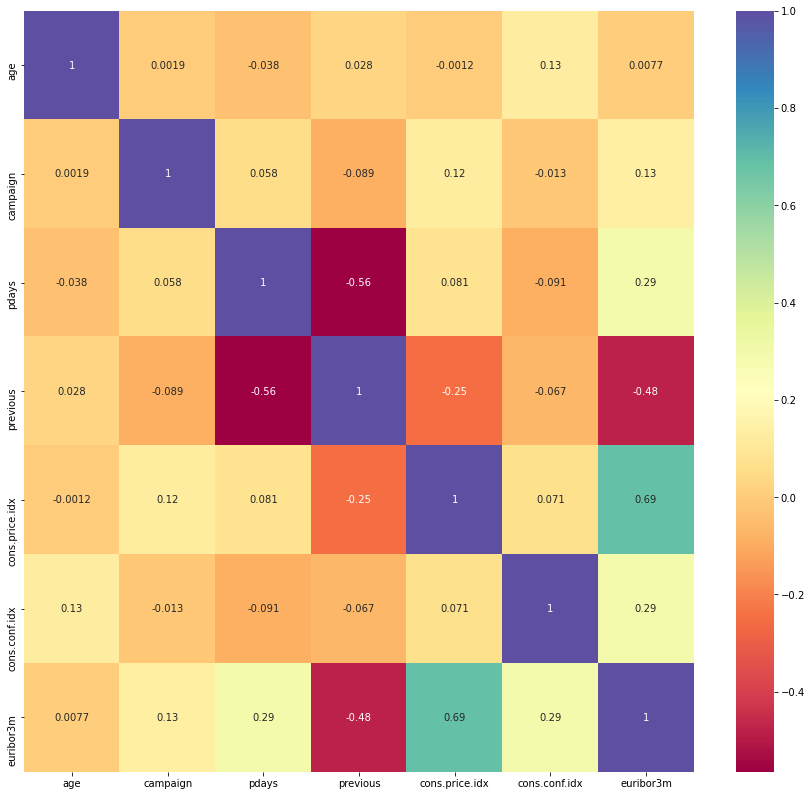

In [27]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

In [28]:
contact = pd.get_dummies(df.contact, drop_first=True)
poutcome = pd.get_dummies(df.poutcome, drop_first=True)
job = pd.get_dummies(df.job, drop_first=True)
month = pd.get_dummies(df.month, drop_first=True)
marital = pd.get_dummies(df.marital, drop_first=True)
day_of_week = pd.get_dummies(df.day_of_week, drop_first=True)
education = pd.get_dummies(df.education, drop_first=True)

df = pd.concat([df, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,...,1,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,no,no,telephone,may,mon,1,...,1,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,yes,no,telephone,may,mon,1,...,1,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,...,1,0,0,0,1,0,0,0,0,0
4,56,services,married,high.school,no,yes,telephone,may,mon,1,...,1,0,0,0,0,0,1,0,0,0


In [29]:
df.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
df.head()

,age,housing,loan,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,no,no,1,999,0,93.994,-36.4,4.857,no,...,1,0,0,0,0,0,0,0,0,0
1,57,no,no,1,999,0,93.994,-36.4,4.857,no,...,1,0,0,0,0,0,1,0,0,0
2,37,yes,no,1,999,0,93.994,-36.4,4.857,no,...,1,0,0,0,0,0,1,0,0,0
3,40,no,no,1,999,0,93.994,-36.4,4.857,no,...,1,0,0,0,1,0,0,0,0,0
4,56,no,yes,1,999,0,93.994,-36.4,4.857,no,...,1,0,0,0,0,0,1,0,0,0


In [30]:
df.columns, len(df.columns)

(Index(['age', 'housing', 'loan', 'campaign', 'pdays', 'previous',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y', 'telephone',
        'nonexistent', 'success', 'blue-collar', 'entrepreneur', 'housemaid',
        'management', 'retired', 'self-employed', 'services', 'student',
        'technician', 'unemployed', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep', 'married', 'single', 'mon', 'thu', 'tue', 'wed',
        'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree'],
       dtype='object'),
 44)

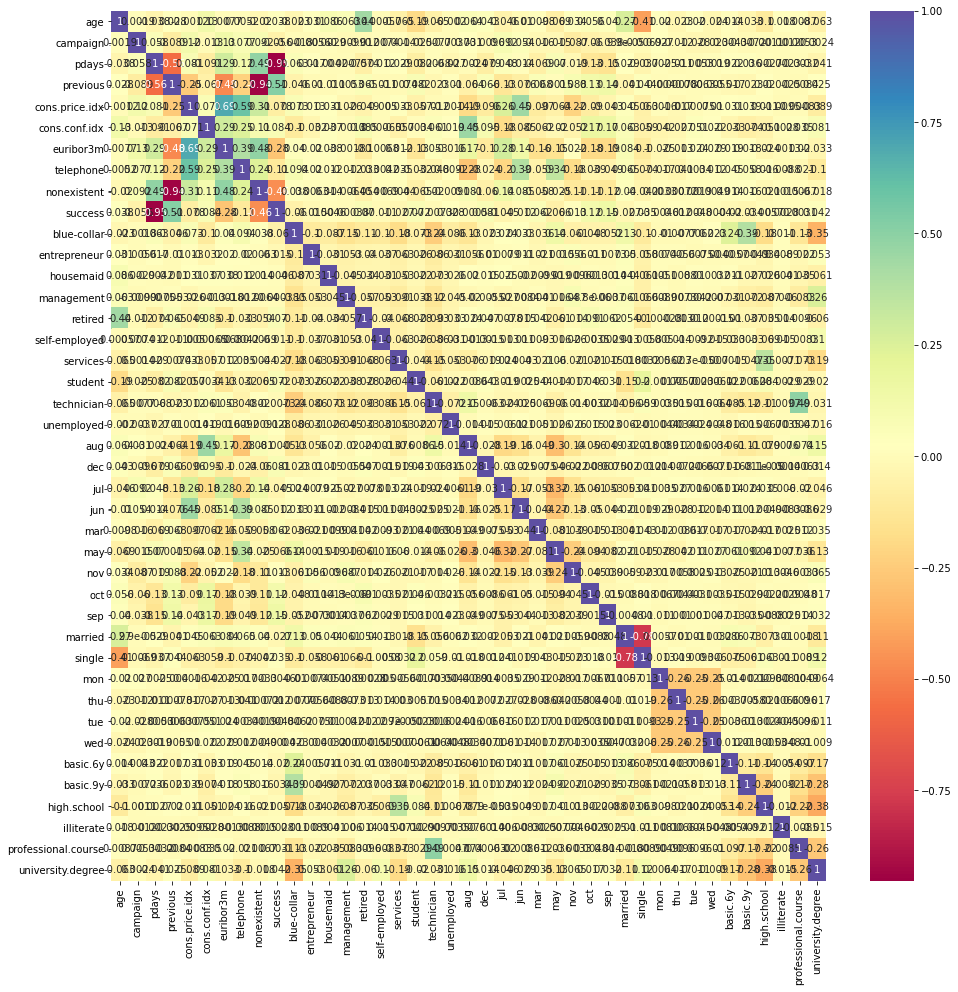

In [31]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

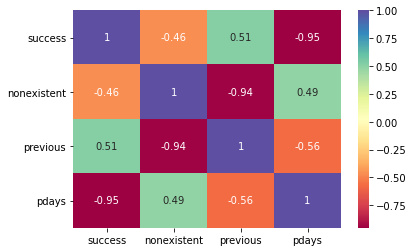

In [32]:
sns.heatmap(df[['success', 'nonexistent', 'previous', 'pdays']].corr(), annot=True, cmap='Spectral')
plt.show()

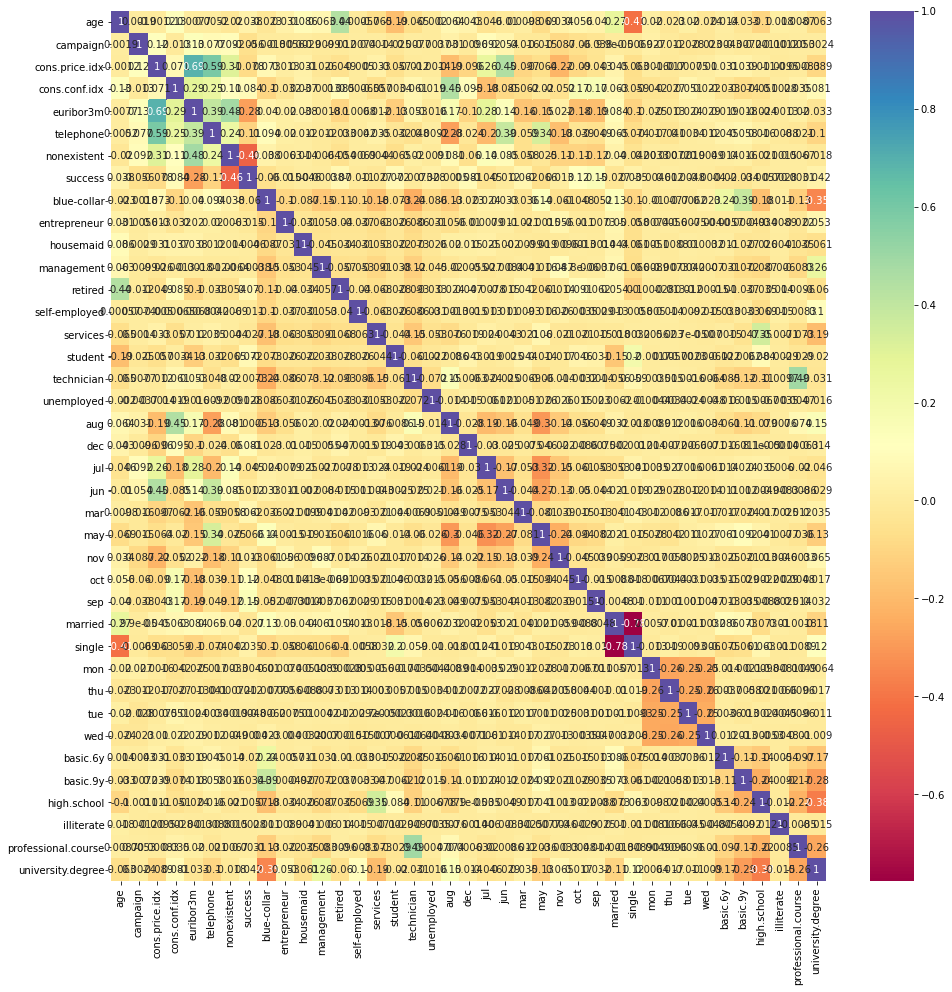

In [33]:
df.drop(['previous', 'pdays'], axis = 1, inplace = True)
var_numerical = list(set(var_numerical) - set(['previous', 'pdays']))

plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  object 
 2   loan                 38245 non-null  object 
 3   campaign             38245 non-null  int64  
 4   cons.price.idx       38245 non-null  float64
 5   cons.conf.idx        38245 non-null  float64
 6   euribor3m            38245 non-null  float64
 7   y                    38245 non-null  object 
 8   telephone            38245 non-null  uint8  
 9   nonexistent          38245 non-null  uint8  
 10  success              38245 non-null  uint8  
 11  blue-collar          38245 non-null  uint8  
 12  entrepreneur         38245 non-null  uint8  
 13  housemaid            38245 non-null  uint8  
 14  management           38245 non-null  uint8  
 15  retired              38245 non-null 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)
print("Train Dataset: "+ str(len(df_train)) + " Test Dataset: " + str(len(df_test)))
print("Train Target Label counts: ")
print(df_train["y"].value_counts())
print("Test Target Label counts: ")
print(df_test["y"].value_counts())

Train Dataset: 30596 Test Dataset: 7649
Train Target Label counts: 
no     27144
yes     3452
Name: y, dtype: int64
Test Target Label counts: 
no     6843
yes     806
Name: y, dtype: int64


In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

df_train[var_numerical] = scaler.fit_transform(df_train[var_numerical])
df_test[var_numerical] = scaler.transform(df_test[var_numerical])
df_train.head()

,age,housing,loan,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
17301,0.098765,yes,yes,0.571429,0.669135,0.338912,0.981183,no,0,1,...,0,0,0,0,0,0,0,0,0,1
26425,0.407407,yes,no,0.000000,0.389322,0.368201,0.780322,no,0,1,...,0,1,0,0,0,0,0,0,0,1
38271,0.111111,yes,no,0.142857,0.089634,1.000000,0.024484,no,0,0,...,0,0,1,0,0,1,0,0,0,0
24709,0.382716,yes,no,0.000000,0.389322,0.368201,0.806393,no,0,1,...,1,0,0,0,0,1,0,0,0,0
2160,0.148148,yes,no,0.000000,0.698753,0.602510,0.957379,no,1,1,...,1,0,0,0,0,0,1,0,0,0


In [38]:
df_test.head()

,age,housing,loan,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
19269,0.407407,no,yes,0.000000,0.484412,0.615063,0.982317,no,0,1,...,0,0,0,1,0,0,1,0,0,0
17957,0.358025,no,no,0.285714,0.669135,0.338912,0.980957,no,0,1,...,0,0,1,0,0,0,0,0,0,1
22711,0.506173,no,no,0.571429,0.484412,0.615063,0.981637,no,0,1,...,0,0,0,0,0,0,1,0,0,0
20420,0.395062,yes,no,0.428571,0.484412,0.615063,0.982090,no,0,1,...,0,0,1,0,1,0,0,0,0,0
38658,0.246914,no,no,0.142857,0.174591,0.866109,0.019270,no,0,0,...,0,0,0,1,0,0,1,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  object 
 2   loan                 38245 non-null  object 
 3   campaign             38245 non-null  int64  
 4   cons.price.idx       38245 non-null  float64
 5   cons.conf.idx        38245 non-null  float64
 6   euribor3m            38245 non-null  float64
 7   y                    38245 non-null  object 
 8   telephone            38245 non-null  uint8  
 9   nonexistent          38245 non-null  uint8  
 10  success              38245 non-null  uint8  
 11  blue-collar          38245 non-null  uint8  
 12  entrepreneur         38245 non-null  uint8  
 13  housemaid            38245 non-null  uint8  
 14  management           38245 non-null  uint8  
 15  retired              38245 non-null 

In [40]:
y_train = df_train.pop('y')
X_train = df_train

y_test = df_test.pop('y')
X_test = df_test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30596, 41), (30596,), (7649, 41), (7649,))